### UNUSED PLOTS AND FUNCTIONS IDK TEMP HERE


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from scipy import stats

df = pd.read_csv('../data/DM2425_ABCDEats_DATASET.csv')

# Strip trailing spaces from column names
df.columns = df.columns.str.strip()
df.columns


# Convert 'customer_age', 'first_order', and 'HR_0' to numeric, coercing errors to NaN
df['customer_age'] = pd.to_numeric(df['customer_age'], errors='coerce').astype('Int64')
df['first_order'] = pd.to_numeric(df['first_order'], errors='coerce').astype('Int64')
df['HR_0'] = pd.to_numeric(df['HR_0'], errors='coerce').astype('Int64')

# Verify the changes
print(df[['customer_age', 'first_order', 'HR_0']].dtypes)


customer_age    Int64
first_order     Int64
HR_0            Int64
dtype: object


/var/folders/dq/lm4hsw5542x634hwm_gj_4bm0000gn/T/ipykernel_95312/974335680.py:8: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/DM2425_ABCDEats_DATASET.csv')


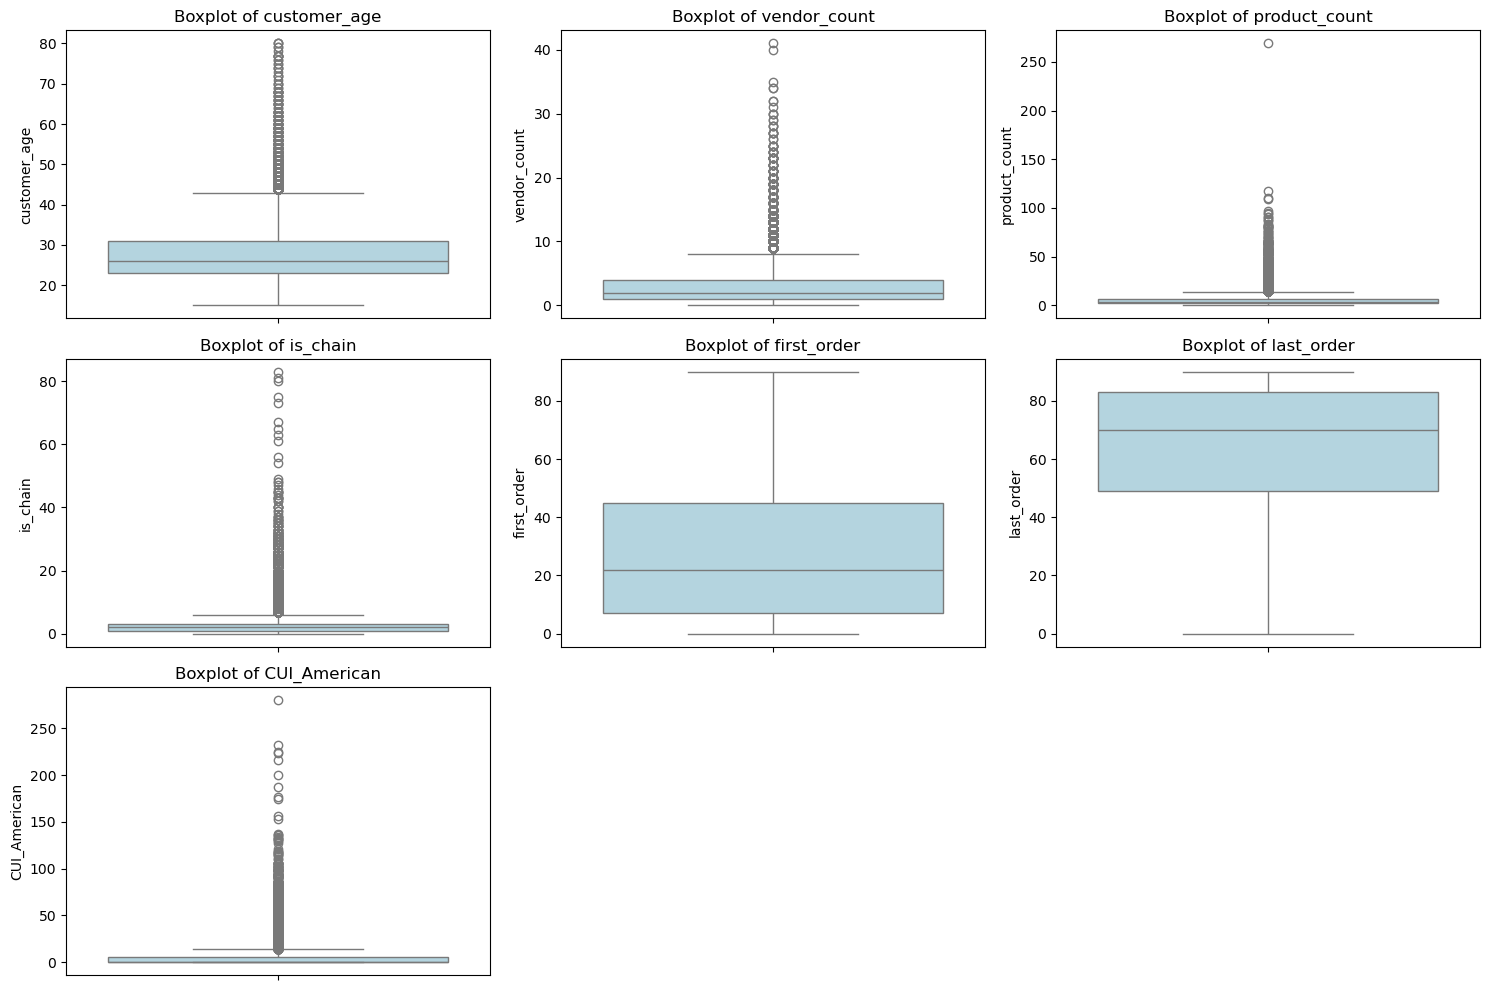

In [2]:
# List of columns to plot
columns_to_plot = [
    'customer_age', 'vendor_count', 'product_count', 
    'is_chain', 'first_order', 'last_order', 'CUI_American'
]

# Create a figure with subplots
plt.figure(figsize=(15, 10))

# Plotting boxplots
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()


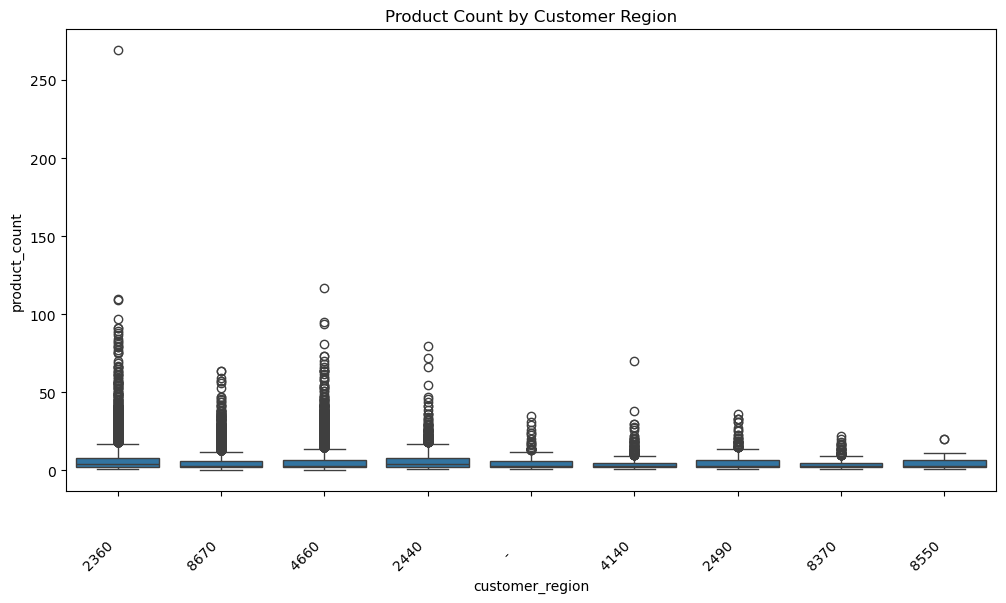

In [3]:
# Boxplot of product_count by customer_region
plt.figure(figsize=(12, 6))
sns.boxplot(x='customer_region', y='product_count', data=df)
plt.xticks(rotation=45)
plt.title('Product Count by Customer Region')
plt.show()


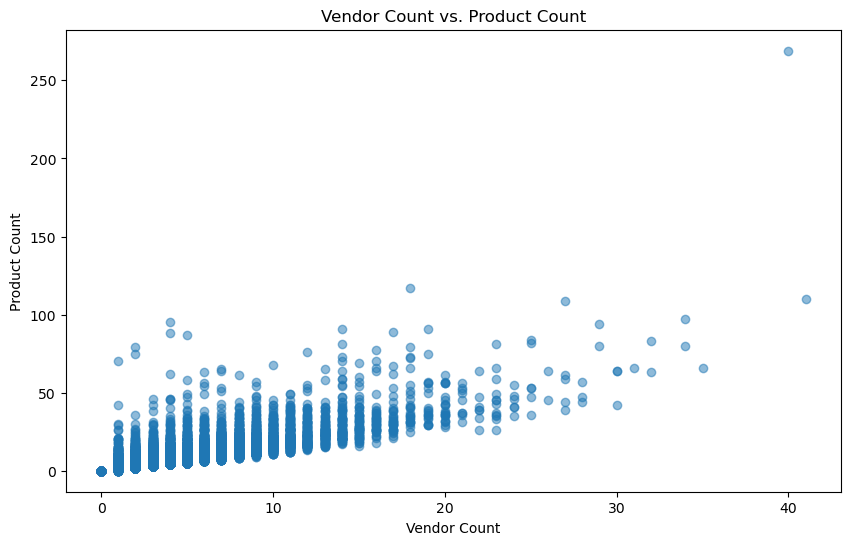

In [4]:
# Scatter plot of vendor_count vs. product_count
plt.figure(figsize=(10, 6))
plt.scatter(df['vendor_count'], df['product_count'], alpha=0.5)
plt.xlabel('Vendor Count')
plt.ylabel('Product Count')
plt.title('Vendor Count vs. Product Count')
plt.show()


In [5]:
# df.corr()
non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns
print(non_numeric_columns)

df_numeric = df.drop(columns=['customer_id', 'customer_region', 'last_promo', 'payment_method'])
corr_matrix = df_numeric.corr()

corr_matrix



Index(['customer_id', 'customer_region', 'last_promo', 'payment_method'], dtype='object')


,customer_age,vendor_count,product_count,is_chain,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
customer_age,1.000000,0.000952,0.005372,0.001783,0.004643,0.012715,0.008004,0.013415,-0.003188,0.006515,...,0.006084,0.005325,0.004002,0.004836,0.008197,-0.003590,-0.003193,0.006217,-0.004439,0.000967
vendor_count,0.000952,1.000000,0.827636,0.762916,-0.386735,0.377479,0.272846,0.307482,0.215641,0.185358,...,0.333791,0.288602,0.309798,0.368721,0.398170,0.389441,0.310358,0.233004,0.192796,0.190071
product_count,0.005372,0.827636,1.000000,0.827071,-0.358568,0.350343,0.335848,0.337223,0.230520,0.273756,...,0.406931,0.393186,0.416981,0.463289,0.449943,0.418980,0.336397,0.235623,0.192515,0.186168
is_chain,0.001783,0.762916,0.827071,1.000000,-0.331144,0.298150,0.266221,0.109205,0.241524,0.237863,...,0.352830,0.308112,0.323691,0.418688,0.456111,0.451465,0.360529,0.253091,0.165580,0.154136
first_order,0.004643,-0.386735,-0.358568,-0.331144,1.000000,0.219895,-0.159178,-0.116353,-0.081930,-0.066465,...,-0.150666,-0.147372,-0.175380,-0.192134,-0.186134,-0.160559,-0.128709,-0.099894,-0.072124,-0.068770
last_order,0.012715,0.377479,0.350343,0.298150,0.219895,1.000000,0.150594,0.151368,0.076547,0.076308,...,0.154960,0.181077,0.181467,0.175733,0.152952,0.125928,0.097895,0.082626,0.070758,0.062984
CUI_American,0.008004,0.272846,0.335848,0.266221,-0.159178,0.150594,1.000000,0.095519,0.006829,0.089817,...,0.147189,0.197519,0.212734,0.181558,0.113253,0.059548,0.041387,0.025869,0.043275,0.051568
CUI_Asian,0.013415,0.307482,0.337223,0.109205,-0.116353,0.151368,0.095519,1.000000,0.093345,0.006014,...,0.058803,0.034119,0.025913,-0.009550,-0.039530,-0.054670,-0.045823,-0.037894,0.076690,0.140164
CUI_Beverages,-0.003188,0.215641,0.230520,0.241524,-0.081930,0.076547,0.006829,0.093345,1.000000,-0.021522,...,0.064185,0.007359,-0.025948,-0.006919,0.019311,0.042498,0.037647,0.027853,0.029024,0.038797
CUI_Cafe,0.006515,0.185358,0.273756,0.237863,-0.066465,0.076308,0.089817,0.006014,-0.021522,1.000000,...,0.115859,0.143299,0.154576,0.124378,0.074091,0.050702,0.025207,0.015363,0.007424,-0.001376
